In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_large_dataset.xlsx to customer_churn_large_dataset (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
import io

uploaded = files.upload()

# Assuming the uploaded file is a CSV and there's only one file uploaded
# You can check the keys of the 'uploaded' dictionary to get the filename
file_name = list(uploaded.keys())[0]

# Read the first few lines of the uploaded file to inspect its format
# We'll read it as a binary file first to avoid encoding issues at this stage
try:
    with open(file_name, 'rb') as f:
        # Read the first 25 lines to inspect the header and the line causing the error
        lines = [f.readline() for _ in range(25)]

    # Attempt to decode the lines using utf-8 for inspection
    try:
        decoded_lines = [line.decode('utf-8', errors='replace') for line in lines]
        print("First 25 lines of the file (decoded with utf-8):")
        for i, line in enumerate(decoded_lines):
            print(f"Line {i+1}: {line.strip()}")
    except Exception as e:
        print(f"Could not decode lines with utf-8 for inspection: {e}")
        # If utf-8 fails, print the raw bytes representation
        print("\nFirst 25 lines of the file (raw bytes):")
        for i, line in enumerate(lines):
            print(f"Line {i+1}: {line}")


except Exception as e:
    print(f"Error reading the file for inspection: {e}")

# Now, attempt to read the CSV file with pandas again,
# potentially adding parameters based on the inspection above.
# For example, if the delimiter is ';', you would change sep=',' to sep=';'
# If there are quoting issues, you might need to adjust the 'quotechar' parameter.
# If the issue is truly inconsistent lines, you might need to read line by line
# or use an engine like 'python' which is less strict but slower.

try:
    # Try reading with the original encoding attempts
    try:
        df = pd.read_csv(file_name, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(file_name, encoding='latin-1')
        except UnicodeDecodeError:
            # If latin-1 also fails, try another common encoding like cp1252
            try:
                 df = pd.read_csv(file_name, encoding='cp1252')
            except UnicodeDecodeError:
                 # If encoding is still an issue, you might need to explore others
                 print("Failed to read with utf-8, latin-1, and cp1252 encodings.")
                 # You might need to add more encoding attempts or manual inspection

    # After successful reading (or if the ParserError still occurs),
    # display the head if df was successfully created
    if 'df' in locals():
        print("\nDataFrame head:")
        display(df.head())

except pd.errors.ParserError as e:
    print(f"\nParserError still occurred: {e}")
    print("Please inspect the printed lines above to identify the issue.")
    print("Consider adjusting 'sep', 'quotechar', or using 'engine='python'' in pd.read_csv.")
except Exception as e:
    print(f"\nAn unexpected error occurred during pandas read_csv: {e}")

**EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [ ]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [ ]:
df.isnull().sum()/len(df)*100

,0
CustomerID,0.0
Name,0.0
Age,0.0
Gender,0.0
Location,0.0
Subscription_Length_Months,0.0
Monthly_Bill,0.0
Total_Usage_GB,0.0
Churn,0.0


In [ ]:
df.duplicated().sum()

np.int64(0)

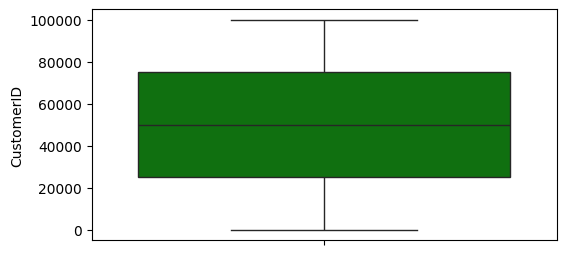

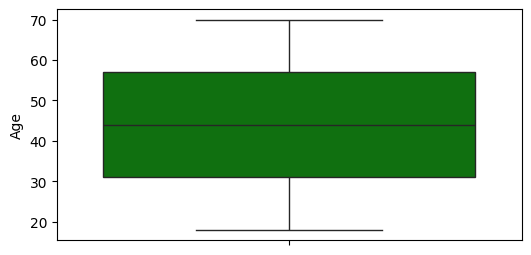

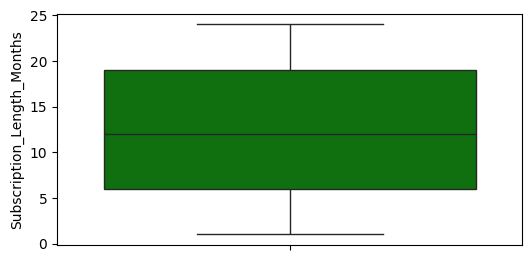

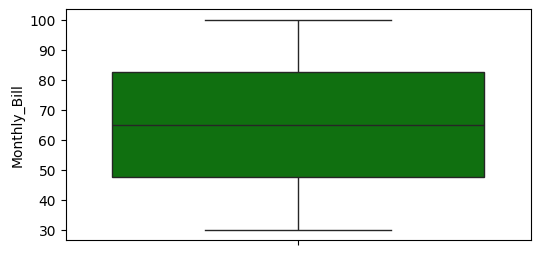

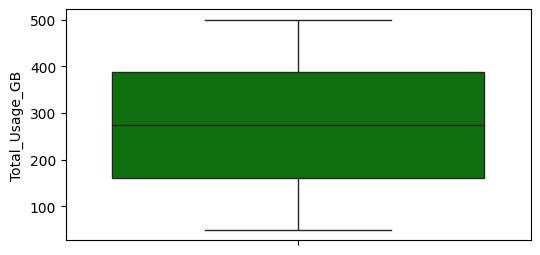

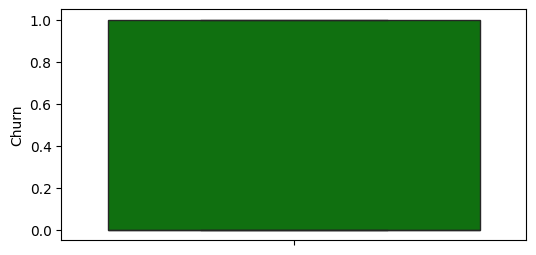

In [ ]:
for i in df.select_dtypes(include='number'):
  plt.figure(figsize=(6,3))
  sns.boxplot(df[i],color='green')
  plt.show()

In [ ]:
df.describe(include='object')

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_99984,Female,Houston
freq,1,50216,20157


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,50216
Male,49784


In [ ]:
df['Location'].value_counts()

,count
Location,
Houston,20157
Los Angeles,20041
Miami,20031
Chicago,19958
New York,19813


In [ ]:
df.drop(['CustomerID', 'Name'],axis=1,inplace=True)

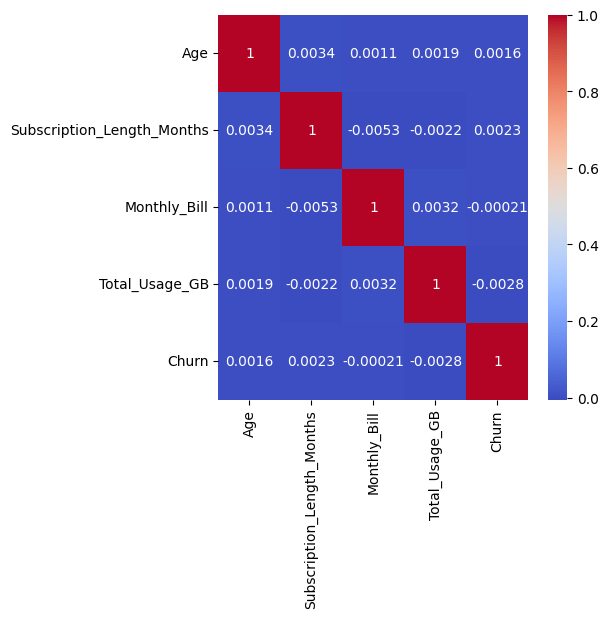

In [ ]:
num_df=df.select_dtypes(include=np.number)
correlation_matrix=num_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print()

missing_values = df.isnull().sum()
data_types = df.dtypes

print('-'*50)
print("Missing values:")
print(missing_values)
print()

x = df.duplicated().sum()
print('-'*50)
print("Duplicate values:", x)
print()


y = df.shape
print('-'*50)
print("Shape of Dataset:", y)
print()

z = df.columns
print('-'*50)
print("Columns of Datset:", z)
print()

print('-'*50)
print("\nData types:")
print(data_types)
print()

Unique values in 'Age': [63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23]

Unique values in 'Gender': ['Male' 'Female']

Unique values in 'Location': ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']

Unique values in 'Subscription_Length_Months': [17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21]

Unique values in 'Monthly_Bill': [73.36 48.76 85.47 ... 75.21 41.98 83.55]

Unique values in 'Total_Usage_GB': [236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 2

**OUTLIER TREATMENT**

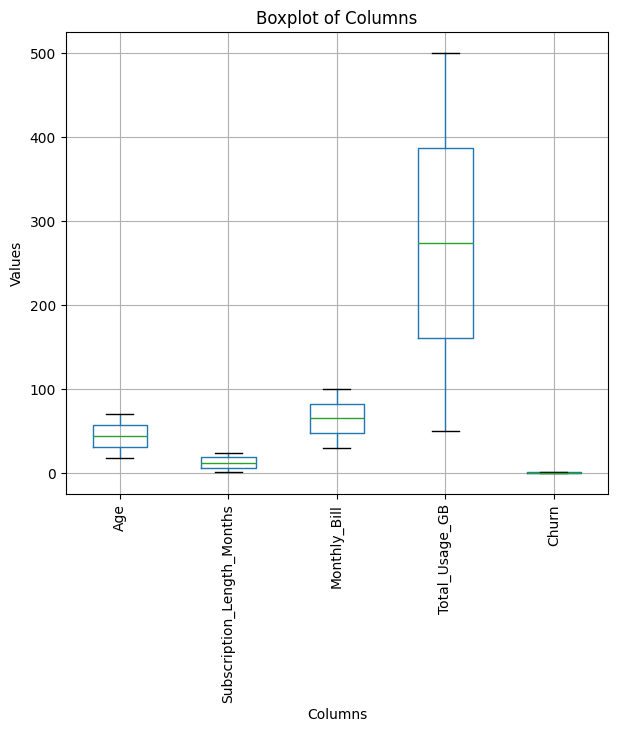

In [ ]:
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(10, 6))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 6)
df.boxplot(ax=ax)
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_cleaned=df.copy()
df_cleaned

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,True,True,False,False,False
99996,62,19,61.65,351,0,False,False,False,False,True
99997,64,17,96.11,251,1,True,False,False,False,False
99998,51,20,49.25,434,1,False,False,False,False,True


In [ ]:
categorical_columns=df.select_dtypes(include='object').columns
categorical_columns

Index(['Gender', 'Location'], dtype='object')

In [ ]:
df=pd.get_dummies(data=df,columns=['Gender', 'Location'],drop_first=True)
df

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,0,True,False,True,False,False
1,62,1,48.76,172,0,False,False,False,False,True
2,24,5,85.47,460,0,False,False,True,False,False
3,36,3,97.94,297,1,False,False,False,True,False
4,46,19,58.14,266,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,True,True,False,False,False
99996,62,19,61.65,351,0,False,False,False,False,True
99997,64,17,96.11,251,1,True,False,False,False,False
99998,51,20,49.25,434,1,False,False,False,False,True


**CHECKING DISTRIBUTION OF DATA**

In [ ]:
import math
def struges_rule(no_of_values):
  k=1+math.log2(no_of_values)
  return round(k)

In [ ]:
no_of_value=100000
struges_rule(no_of_value)

18

In [ ]:
continue_vars=df.select_dtypes(include=['int','float']).columns
binary_vars=df.select_dtypes(include='bool').columns
continue_vars = [var for var in continue_vars if var not in binary_vars]

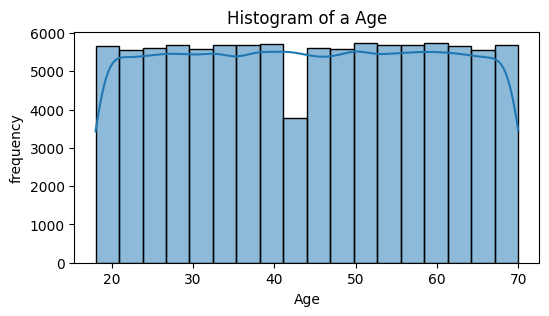

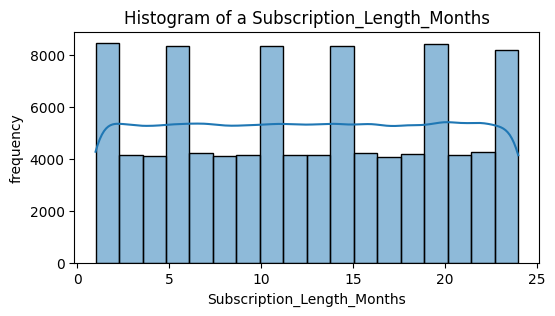

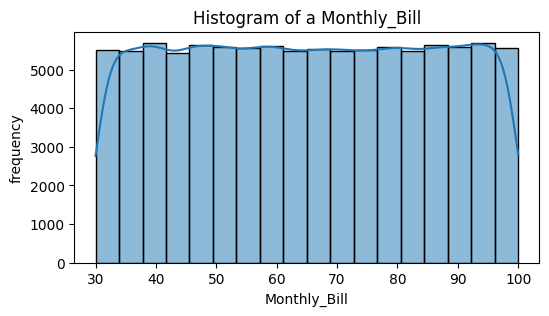

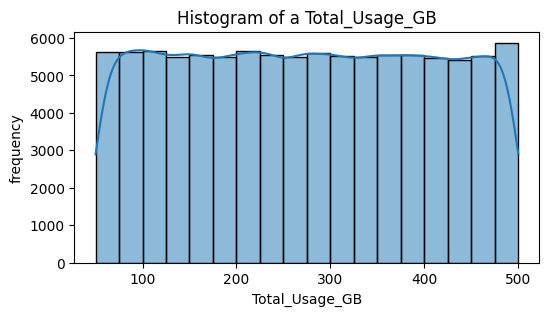

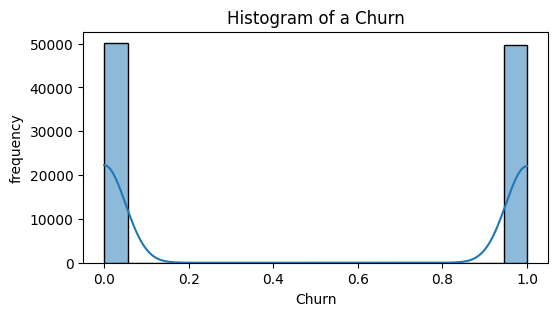

In [ ]:
for var in continue_vars:
  plt.figure(figsize=(6,3))
  sns.histplot(data=df,x=var,bins=18,kde=True)
  plt.xlabel(var)
  plt.ylabel('frequency')
  plt.title(f'Histogram of a {var}')
  plt.show()

**CHECK CO-LINEARITY BETWEEN VARIABLES**

In [ ]:
skewness_values = df[continue_vars].skew()
print(skewness_values)

Age                          -0.002689
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
Churn                         0.008840
dtype: float64


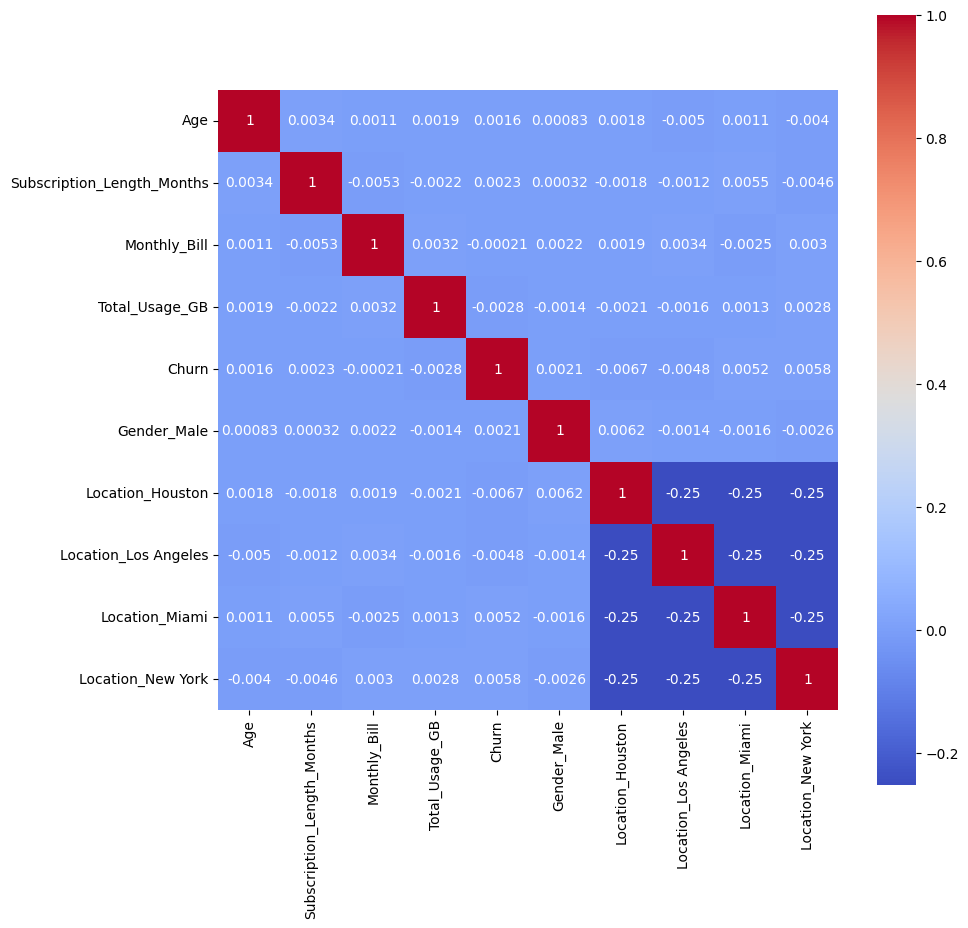

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',square=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape,y_train.shape

((70000, 9), (70000,))

In [ ]:
x_test.shape,y_test.shape

((30000, 9), (30000,))

**FEATURE SCALING**

In [ ]:
column_check=df.columns
column_check=df.columns
column_scaled=[]
for col in column_check:
  if(df[col].gt(1).any()) or (df[col].lt(0).any()):
    column_scaled.append(col)
column_scaled

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale=['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
scaler=MinMaxScaler()
x_train[columns_to_scale]=scaler.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale]=scaler.transform(x_test[columns_to_scale])

In [ ]:
x_train.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
76513,0.134615,0.521739,0.973425,0.928889,True,False,True,False,False
60406,0.692308,0.043478,0.598657,0.740000,False,True,False,False,False
27322,0.269231,0.826087,0.509358,0.837778,True,False,False,False,False
53699,0.826923,0.478261,0.760109,0.031111,False,True,False,False,False
65412,1.000000,0.173913,0.170453,0.108889,False,False,False,False,True


In [ ]:
class_count=df['Churn'].value_counts()
class_count

,count
Churn,
0,50221
1,49779


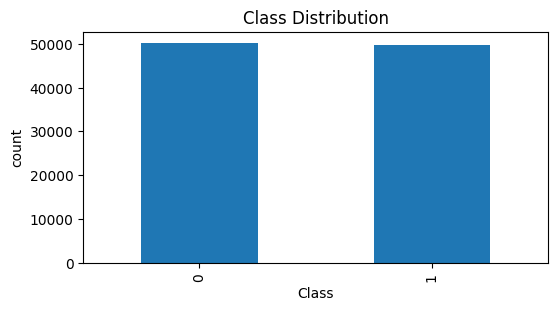

In [ ]:
plt.figure(figsize=(6,3))
class_count.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('count')
plt.show()

**FEATURE SELECTION USING RANDOM FOREST FEATURE IMPORTANCE METHOD**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_jobs=-1,random_state=42)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
feature_importance=rf_classifier.feature_importances_
feature_importance_df=pd.DataFrame({'Feature':x_train.columns,'Importance':feature_importance})
feature_importance_df=feature_importance_df.sort_values(by='Importance',ascending=False).reset_index(drop=True)
feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


In [ ]:
sorted_indices=np.argsort(feature_importance)[::-1]
sorted_indices

array([2, 3, 0, 1, 4, 6, 5, 7, 8])

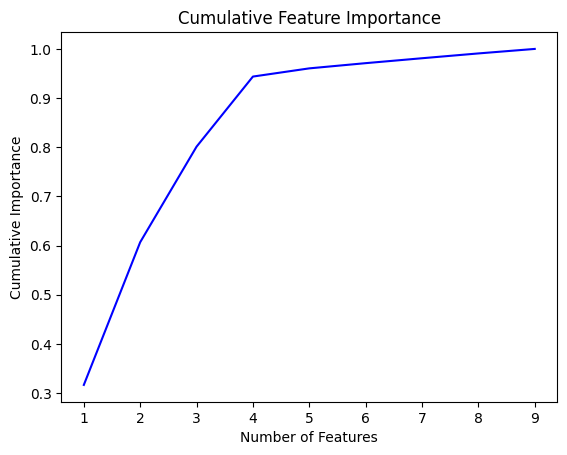

In [ ]:
cumulative_importance=np.cumsum(feature_importance[sorted_indices])
plt.plot(range(1,len(feature_importance)+1),cumulative_importance,'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.show()

In [ ]:
x_train.dtypes

,0
Age,float64
Subscription_Length_Months,float64
Monthly_Bill,float64
Total_Usage_GB,float64
Gender_Male,bool
Location_Houston,bool
Location_Los Angeles,bool
Location_Miami,bool
Location_New York,bool


In [ ]:
x_train=x_train.astype(float)
x_train = x_train.replace([np.inf, -np.inf], np.nan).dropna()

**CHECKING MULTI COLINEARITY OF X_TRAIN_RESAMPLED**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['variable']=x_train.columns
vif_data['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif_data=vif_data.sort_values(by='VIF',ascending=False)
vif_data


,variable,VIF
2,Monthly_Bill,3.340229
3,Total_Usage_GB,3.304982
0,Age,3.252427
1,Subscription_Length_Months,3.152641
4,Gender_Male,1.880472
7,Location_Miami,1.729954
5,Location_Houston,1.728491
6,Location_Los Angeles,1.718256
8,Location_New York,1.715994


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_x_train = x_train.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data['variable'] = numerical_x_train.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_x_train.values, i) for i in range(numerical_x_train.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,variable,VIF
2,Monthly_Bill,3.055387
3,Total_Usage_GB,3.043292
0,Age,3.003087
1,Subscription_Length_Months,2.922635
5,Location_Houston,1.612862
7,Location_Miami,1.612631
6,Location_Los Angeles,1.609862
8,Location_New York,1.607036
4,Gender_Male,1.000076


**MODEL BUILDING : MACHINE LEARNING ALGORITHMS**

In [ ]:
import time
from sklearn.metrics import classification_report,precision_score,accuracy_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
algorithms=[LogisticRegression(n_jobs=-1,random_state=42),DecisionTreeClassifier(random_state=42)
,KNeighborsClassifier(n_jobs=-1),GaussianNB(),AdaBoostClassifier(random_state=42),GradientBoostingClassifier(random_state=42),RandomForestClassifier(n_jobs=-1,random_state=42),
            XGBClassifier(n_jobs=-1,random_state=42),SVC(random_state=42)]

In [ ]:
results_train={
    'Algorithm':[],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1_Score':[],
    "Building Time(s)":[]
}

In [ ]:
for algorithm in algorithms:
  start_time=time.time()
  algorithm_name=type(algorithm).__name__
  algorithm.fit(x_train,y_train)
  y_train_pred=algorithm.predict(x_train)
  accuracy=accuracy_score(y_train,y_train_pred)
  precision=precision_score(y_train,y_train_pred,average='weighted')
  recall=recall_score(y_train,y_train_pred,average='weighted')
  f1=f1_score(y_train,y_train_pred,average='weighted')

  end_time=time.time()
  building_time=end_time-start_time
  results_train['Algorithm'].append(algorithm_name)
  results_train['Accuracy'].append(accuracy)
  results_train['Precision'].append(precision)
  results_train['F1_Score'].append(f1)
  results_train['Recall'].append(recall)
  results_train['Building Time(s)'].append(building_time)

****

*   Decision Tree, Random Forest, and Gradient Boosting achieved perfect accuracy on the training data, suggesting potential overfitting.

*   Logistic Regression, GaussianNB, and AdaBoost have relatively low accuracy and F1-score.

*   KNeighborsClassifier and XGBClassifier have moderate accuracy and F1-score.

*   KNeighborsClassifier and XGBClassifier have moderate accuracy and F1-score.





In [ ]:
df_train=pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1_Score,Building Time(s)
0,LogisticRegression,0.503814,0.503753,0.503814,0.500719,2.705255
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.805995
2,KNeighborsClassifier,0.687743,0.687744,0.687743,0.687743,20.523095
3,GaussianNB,0.504471,0.504419,0.504471,0.503437,0.058428
4,AdaBoostClassifier,0.509057,0.509142,0.509057,0.505700,2.464375
5,GradientBoostingClassifier,0.541729,0.541847,0.541729,0.541213,9.184076
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,22.361591
7,XGBClassifier,0.671286,0.671308,0.671286,0.671266,0.975562
8,SVC,0.510129,0.510151,0.510129,0.508461,776.360081


In [ ]:
results_test={
    'Algorithm':[],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1_Score':[],
}

In [ ]:
for algorithm in algorithms:
  algorithm_name=type(algorithm).__name__
  y_test_pred=algorithm.predict(x_test)
  accuracy=accuracy_score(y_test,y_test_pred)
  precision=precision_score(y_test,y_test_pred,average='weighted')
  recall=recall_score(y_test,y_test_pred,average='weighted')
  f1=f1_score(y_test,y_test_pred,average='weighted')

  results_test['Algorithm'].append(algorithm_name)
  results_test['Accuracy'].append(accuracy)
  results_test['Precision'].append(precision)
  results_test['Recall'].append(recall)
  results_test['F1_Score'].append(f1)

In [ ]:
df_test=pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1_Score
0,LogisticRegression,0.499833,0.499305,0.499833,0.498251
1,DecisionTreeClassifier,0.498700,0.498900,0.498700,0.498604
2,KNeighborsClassifier,0.499500,0.499760,0.499500,0.499300
3,GaussianNB,0.496567,0.499498,0.496567,0.445231
4,AdaBoostClassifier,0.500067,0.500550,0.500067,0.499185
5,GradientBoostingClassifier,0.502767,0.502549,0.502767,0.502414
6,RandomForestClassifier,0.500567,0.502054,0.500567,0.492241
7,XGBClassifier,0.499333,0.499912,0.499333,0.497979
8,SVC,0.500900,0.504301,0.500900,0.471611


****

*   Most algorithms have mediocre performance on the test data, with accuracy close to random guessing (around 0.5).

*   Decision Tree, Random Forest, and Gradient Boosting also show subpar results, indicating overfitting.

*   No algorithm is performing well, so I decided to take only 4 variables that contribute more to the target variable and build the model again.

*   I removed the age and location variables because they are not good predictors of whether a customer will churn or not.





In [ ]:
x_train=x_train[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]
x_test=x_test[['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months']]

In [ ]:
x_train.columns

Index(['Monthly_Bill', 'Total_Usage_GB', 'Age', 'Subscription_Length_Months'], dtype='object')

In [ ]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]


results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

for algorithm in algorithms:
    start_time = time.time()

    algorithm_name = type(algorithm).__name__
    algorithm.fit(x_train, y_train)
    y_train_pred = algorithm.predict(x_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)


df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.503400,0.503356,0.503400,0.496215,2.178861
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.692021
2,KNeighborsClassifier,0.686600,0.686602,0.686600,0.686596,5.571995
3,GaussianNB,0.501486,0.501325,0.501486,0.493915,0.043887
4,AdaBoostClassifier,0.508700,0.508998,0.508700,0.501191,1.747940
5,GradientBoostingClassifier,0.538557,0.538573,0.538557,0.538399,7.779172
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,20.772363
7,XGBClassifier,0.662214,0.662220,0.662214,0.662205,0.731700
8,SVC,0.517714,0.517997,0.517714,0.514748,462.471838


In [ ]:
results_test={
    'Algorithm':[],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1-Score':[]
}

for algorithm in algorithms:
  algorithm_name=type(algorithm).__name__
  y_test_pred=algorithm.predict(x_test)
  accuracy=accuracy_score(y_test,y_test_pred)
  precision = precision_score(y_test, y_test_pred, average='weighted')
  recall = recall_score(y_test, y_test_pred, average='weighted')
  f1 = f1_score(y_test, y_test_pred, average='weighted')

  results_test['Algorithm'].append(algorithm_name)
  results_test['Accuracy'].append(accuracy)
  results_test['Precision'].append(precision)
  results_test['Recall'].append(recall)
  results_test['F1-Score'].append(f1)

df_test = pd.DataFrame(results_test)
df_test


,Algorithm,Accuracy,Precision,Recall,F1-Score
0,LogisticRegression,0.498600,0.497328,0.498600,0.491694
1,DecisionTreeClassifier,0.500400,0.500360,0.500400,0.500372
2,KNeighborsClassifier,0.497900,0.497918,0.497900,0.497907
3,GaussianNB,0.499333,0.498084,0.499333,0.492268
4,AdaBoostClassifier,0.499967,0.498741,0.499967,0.492792
5,GradientBoostingClassifier,0.502000,0.501906,0.502000,0.501909
6,RandomForestClassifier,0.505767,0.505583,0.505767,0.505489
7,XGBClassifier,0.500233,0.500166,0.500233,0.500178
8,SVC,0.501767,0.501045,0.501767,0.498682


****

*   Decision Tree and Random Forest overfits.

*   No algorithm is performing well, so I decided to build model using neural networks.

*   If the neural network does not provide better results than machine learning algorithms, then I will build ensembles of random forests because random forests achieve perfect scores in all metrics in the training data. Decision trees also achieve perfect scores in all metrics in the training data, but I have already tried and tested multiple ensembles that use decision trees. Therefore, I will now build ensembles using random forests.





**MODEL BUILDING : NEURAL NETWORK**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.metrics import recall_score

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True
)

In [ ]:
checkpoint=ModelCheckpoint('ChurnClassifier.h5',monitor='val_loss',verbose=1,save_best_only=True,mode='min')

**BUILD NEURAL NETWORK ARCHITECTURE & FIT MODEL ON TRAINING DATA**

**Architecture I**

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history =model.fit(x_train,y_train,epochs=100,batch_size=128,validation_split=0.3,callbacks=[early_stopping,checkpoint],verbose=1)


Epoch 1/100
368/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5039 - loss: 0.6937
Epoch 1: val_loss improved from inf to 0.69315, saving model to ChurnClassifier.h5


383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5040 - loss: 0.6937 - val_accuracy: 0.5011 - val_loss: 0.6931
Epoch 2/100
373/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: 0.6933
Epoch 2: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5015 - loss: 0.6933 - val_accuracy: 0.5034 - val_loss: 0.6934
Epoch 3/100
368/383 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5009 - loss: 0.6934
Epoch 3: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5010 - loss: 0.6933 - val_accuracy: 0.4958 - val_loss: 0.6933
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5009 - loss: 0.6932
Epoch 4: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 5/100
367/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5072 - loss: 0.6931
Epoch 5: val_loss did not improve from 0.69

**Architecture II**

In [ ]:
model =Sequential()
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu',input_dim=4))
model.add(Dense(units=32,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=16,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
369/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4991 - loss: 0.6932
Epoch 1: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 2/100
366/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5010 - loss: 0.6932
Epoch 2: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 3/100
381/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5031 - loss: 0.6931
Epoch 3: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5031 - loss: 0.6931 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 4/100
377/383 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5036 - loss: 0.6931
Epoch 4: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5035 - loss: 0.6931 - val_accuracy: 0.4967 - val_loss: 0.6

**Architecture III**

In [ ]:
model = Sequential()

model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from keras.optimizers import SGD

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
366/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5056 - loss: 0.6931
Epoch 1: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5055 - loss: 0.6931 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 2/100
378/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4986 - loss: 0.6932
Epoch 2: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 3/100
377/383 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5060 - loss: 0.6931
Epoch 3: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.4967 - val_loss: 0.6932
Epoch 4/100
380/383 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5010 - loss: 0.6932
Epoch 4: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.4967 - val_loss: 0.6

**Architecture IV**

In [ ]:
model = Sequential()

model.add(Dense(10, input_dim=4, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(5, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.3, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
376/383 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5009 - loss: 0.7334
Epoch 1: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5009 - loss: 0.7330 - val_accuracy: 0.5077 - val_loss: 0.6944
Epoch 2/100
374/383 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4965 - loss: 0.6984
Epoch 2: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4966 - loss: 0.6983 - val_accuracy: 0.5045 - val_loss: 0.6936
Epoch 3/100
377/383 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4997 - loss: 0.6952
Epoch 3: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4998 - loss: 0.6952 - val_accuracy: 0.5036 - val_loss: 0.6935
Epoch 4/100
373/383 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5062 - loss: 0.6944
Epoch 4: val_loss did not improve from 0.69315
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5061 - loss: 0.6944 - val_accuracy: 0.5033 - val_loss: 0.6

**Architecture V**

In [ ]:
model = Sequential([
    Dense(64, activation = 'relu', input_dim = 4),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping, checkpoint],
                    verbose=1)

Epoch 1/100
426/438 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.6966
Epoch 1: val_loss did not improve from 0.69315
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5078 - loss: 0.6966 - val_accuracy: 0.4969 - val_loss: 0.6932
Epoch 2/100
430/438 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5006 - loss: 0.6935
Epoch 2: val_loss did not improve from 0.69315
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5006 - loss: 0.6935 - val_accuracy: 0.4958 - val_loss: 0.6932
Epoch 3/100
428/438 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5002 - loss: 0.6934
Epoch 3: val_loss did not improve from 0.69315
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5002 - loss: 0.6934 - val_accuracy: 0.4990 - val_loss: 0.6932
Epoch 4/100
434/438 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5007 - loss: 0.6932
Epoch 4: val_loss did not improve from 0.69315
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4953 - val_loss: 0.6



*   **I have tried multiple ANN architectures, but none of them have provided good results.**




**Ensembles of Random Forest**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

models = ['AdaBoost', 'Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

for model in [adaboost_model, gradient_boost_model, xgboost_model]:
    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()

    y_train_pred = model.predict(x_train)

    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    y_test_pred = model.predict(x_test)

    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

print("Training Data Results:")
results_train_df

Training Data Results:


,Accuracy,Precision,Recall,F1 Score,Building Time
AdaBoost,1.000000,1.000000,1.000000,1.000000,26.58804
Gradient Boosting,0.530471,0.530660,0.530471,0.529365,3.69662
XGBoost,0.622186,0.622185,0.622186,0.622182,0.31215


****

*   The performance of ensembles can vary, but they are usually not much better than individual algorithms.

*   None of the ensembles provided the desired results. So, I decided to trial and error using a different approach.





**MODEL BUILDING :PCA**

In [ ]:
x=df_cleaned.drop('Churn',axis=1)
y=df_cleaned['Churn']

In [ ]:
x

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,17,73.36,236,True,False,True,False,False
1,62,1,48.76,172,False,False,False,False,True
2,24,5,85.47,460,False,False,True,False,False
3,36,3,97.94,297,False,False,False,True,False
4,46,19,58.14,266,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,True,True,False,False,False
99996,62,19,61.65,351,False,False,False,False,True
99997,64,17,96.11,251,True,False,False,False,False
99998,51,20,49.25,434,False,False,False,False,True


In [ ]:
x.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [ ]:
y

,Churn
0,0
1,0
2,0
3,1
4,0
...,...
99995,1
99996,0
99997,1
99998,1


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [ ]:
x_test.head()

,0,1,2,3,4,5,6,7,8
0,0.261620,-0.214541,1.155784,1.664963,-0.994302,1.989613,-0.500312,-0.502499,-0.498169
1,0.327064,0.074501,-1.209728,1.136259,1.005731,-0.502610,-0.500312,-0.502499,2.007351
2,-0.850926,-1.081667,-1.585284,0.009891,-0.994302,-0.502610,1.998751,-0.502499,-0.498169
3,0.588840,-1.226188,1.461171,0.492620,1.005731,-0.502610,-0.500312,-0.502499,2.007351
4,-1.374477,1.664231,0.845950,0.224437,-0.994302,-0.502610,1.998751,-0.502499,-0.498169


In [ ]:
from sklearn.decomposition import PCA
pca=PCA()
x_train_pca=pca.fit_transform(x_train)

In [ ]:
x_train_pca.shape

(70000, 9)

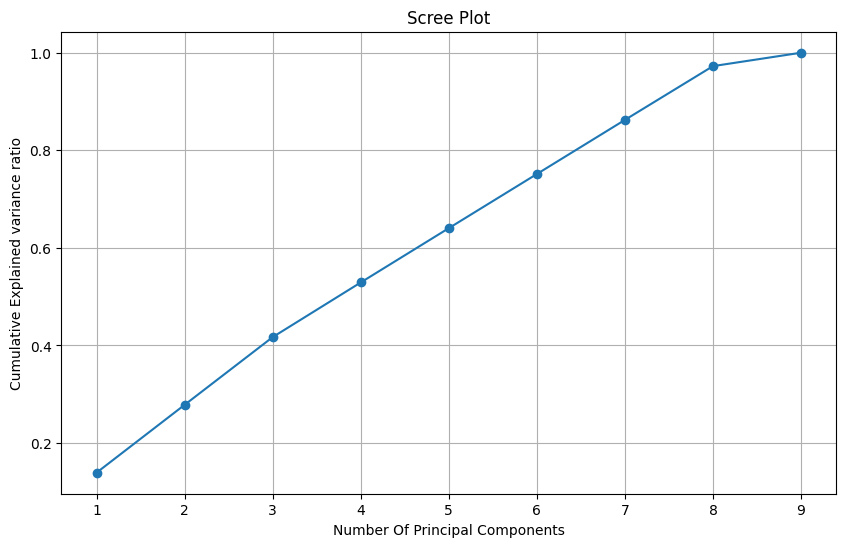

In [ ]:
explained_variance=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance)
plt.figure(figsize=(10,6))
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance,marker='o')
plt.title('Scree Plot')
plt.xlabel('Number Of Principal Components')
plt.ylabel('Cumulative Explained variance ratio')
plt.grid()
plt.show()

**8 out of 9 principal components (PCs) capture approximately 98% of the variance of the data. Therefore, I will select 8 PCs for further analysis.**

In [ ]:
pca=PCA(n_components=8)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

In [ ]:
x_train_pca.shape,x_test_pca.shape

((70000, 8), (30000, 8))

In [ ]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

In [ ]:
for algorithm in algorithms:
    start_time = time.time()

    algorithm_name = type(algorithm).__name__
    algorithm.fit(x_train_pca, y_train)
    y_train_pred = algorithm.predict(x_train_pca)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.504043,0.503983,0.504043,0.502486,4.160579
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,9.001232
2,KNeighborsClassifier,0.688157,0.688157,0.688157,0.688157,6.398933
3,GaussianNB,0.505600,0.505607,0.505600,0.501428,0.079305
4,AdaBoostClassifier,0.504443,0.528289,0.504443,0.365366,9.918918
5,GradientBoostingClassifier,0.539686,0.540777,0.539686,0.536052,48.348024
6,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,63.740596
7,XGBClassifier,0.693443,0.693461,0.693443,0.693429,0.942543
8,SVC,0.522286,0.522553,0.522286,0.520142,530.571010


In [ ]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(x_test_pca)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.503633,0.503159,0.503633,0.502126
1,DecisionTreeClassifier,0.495600,0.495610,0.495600,0.495605
2,KNeighborsClassifier,0.496733,0.496756,0.496733,0.496742
3,GaussianNB,0.503667,0.502901,0.503667,0.499713
4,AdaBoostClassifier,0.506000,0.509848,0.506000,0.367540
5,GradientBoostingClassifier,0.502233,0.501418,0.502233,0.498211
6,RandomForestClassifier,0.497167,0.496982,0.497167,0.496917
7,XGBClassifier,0.499367,0.499333,0.499367,0.499344
8,SVC,0.502633,0.501998,0.502633,0.500093


In [ ]:
x = df_cleaned.drop("Churn",axis=1)
y = df_cleaned['Churn']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((70000, 9), (30000, 9))

In [ ]:
x_train.columns

Index(['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York'],
      dtype='object')

In [ ]:
x_test.columns

RangeIndex(start=0, stop=9, step=1)

In [ ]:
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
columns_to_scale = [col for col in columns_to_scale if col in x_train.columns]

print(x_train[columns_to_scale].head())
print(x_train[columns_to_scale].dtypes)



Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Series([], dtype: object)


In [ ]:
print(x_train.columns.tolist())


[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [ ]:
x_train.columns=['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York']

In [ ]:
print(x_train.columns.tolist())

['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Gender_Male', 'Location_Houston', 'Location_Los Angeles', 'Location_Miami', 'Location_New York']


In [ ]:
print(x_train.shape)
print(x_train[columns_to_scale].head())
print(x_train[columns_to_scale].dtypes)


(70000, 9)
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Series([], dtype: object)


In [ ]:
x_test.columns

RangeIndex(start=0, stop=9, step=1)

In [ ]:
x_test.columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York']

In [ ]:
columns_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

scaler = MinMaxScaler()

x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])

x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])

In [ ]:
xgb_classifier = XGBClassifier(
    objective='binary:logistic',
    random_state=42
)

In [ ]:
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_tain_pred=xgb_classifier.predict(x_train)
y_test_pred=xgb_classifier.predict(x_test)
train_accuracy=accuracy_score(y_train,y_train_pred)
train_precision=precision_score(y_train,y_train_pred)
train_recall=recall_score(y_train,y_train_pred)
train_f1=f1_score(y_train,y_train_pred)

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [ ]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

In [ ]:
results

,Metric,Train,Test
0,Accuracy,0.522286,0.499333
1,Precision,0.524587,0.494809
2,Recall,0.455355,0.552061
3,F1-Score,0.487525,0.521869


**HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid ={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.001],
    'n_estimators':[50,100,150]
}

In [ ]:
grid_search =GridSearchCV(estimator=xgb_classifier,param_grid=param_grid,scoring='recall',cv=5)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='recall')

**According to the problem statement, false negatives are more important to reduce. Therefore, I selected recall as a metric to focus on.**

In [ ]:
best_xgb=grid_search.best_estimator_
y_test_pred=best_xgb.predict(x_test)
test_recall=recall_score(y_test,y_test_pred)

In [ ]:
print('Best Parameters:',grid_search.best_params_)
print('Test Recall with Best model:',test_recall)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Test Recall with Best model: 0.5631061422413793


**After hyperparameter tuning, the performance of the model did not improve. Hence, I choose XGBoost CLassifier without hyperparameter tunning and perform cross-validation on it.**

**CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_classifier,x_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)
print('Cross-validation Scores (Accuracy):',scores)
print()
print("Mean Accuracy Score:",scores.mean())


Cross-validation Scores (Accuracy): [0.50014286 0.4995     0.49857143 0.50128571 0.51042857]

Mean Accuracy Score: 0.5019857142857143


In [ ]:
scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.49363103 0.49441741 0.49885485 0.49914114 0.49370169]

Mean Recall Score: 0.49594922327428986


**FINDING OPTIMAL THRESHOLD**

In [ ]:
probabilities = xgb_classifier.predict_proba(x_train)

predicted_labels = xgb_classifier.predict(x_train)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
84586,0.608377,1,1
82709,0.546980,1,1
5556,0.764847,1,1
67786,0.447295,0,0
36539,0.477498,1,0
83996,0.544779,0,1
45485,0.474019,1,0
11919,0.683377,1,1
49530,0.181954,0,0
16145,0.319566,0,0


In [ ]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for threshold in thresholds:
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)
    accuracy = accuracy_score(y_train, predicted_labels)
    precision = precision_score(y_train, predicted_labels, zero_division=1)
    recall = recall_score(y_train, predicted_labels, zero_division=1)
    f1 = f1_score(y_train, predicted_labels, zero_division=1)
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)

In [ ]:
metrics_df

,Probability,Accuracy,Precision,Recall,F1 Score
0,0.1,0.499186,0.499100,1.000000,0.665866
1,0.2,0.501786,0.500401,1.000000,0.667023
2,0.3,0.517914,0.508637,0.998855,0.674040
3,0.4,0.583114,0.546273,0.971487,0.699316
4,0.5,0.671286,0.672974,0.663880,0.668396
5,0.6,0.584471,0.873371,0.195671,0.319714
6,0.7,0.518900,0.973565,0.036901,0.071107
7,0.8,0.503714,1.000000,0.005468,0.010876
8,0.9,0.501143,1.000000,0.000315,0.000630
9,1.0,0.500986,1.000000,0.000000,0.000000


**Check the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)**

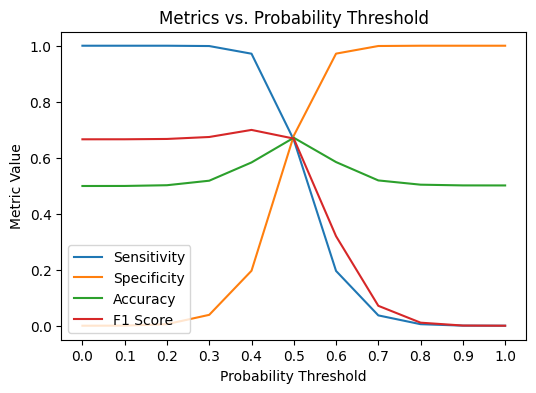

In [ ]:
from sklearn.metrics import confusion_matrix

train_probabilities = xgb_classifier.predict_proba(x_train)[:, 1]

thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train, train_predictions))

plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()

**The graph indicates that 0.5 is the best threshold point, where accuracy, sensitivity, specificity, and F1 score are all stable.**

**MODEL EVALUATION (XG BOOST)**

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

y_test_pred = xgb_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.522286,0.522557,0.522154,0.520078
1,Test,0.498900,0.498676,0.498678,0.498535


**CONFUSION MATRIX**

In [ ]:
from sklearn.metrics import confusion_matrix

train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)
train_total = len(y_train)
test_total = len(y_test)

train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])

confusion_matrix_df

,Training Set,Test Set
True Positive (%),32.778571,26.293333
True Negative (%),17.320000,24.213333
False Positive (%),19.110000,25.896667
False Negative (%),30.791429,23.596667


**ROC -AUC CURVE**

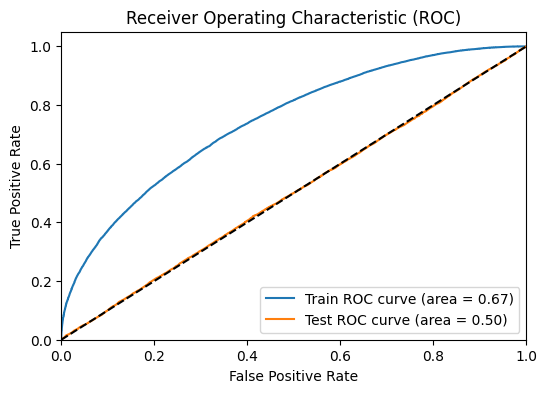

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

train_probabilities = xgb_classifier.predict_proba(x_train)[:, 1]

train_predictions = (train_probabilities >= 0.50).astype(int)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

roc_auc_train = roc_auc_score(y_train, train_predictions)

test_probabilities = xgb_classifier.predict_proba(x_test)[:, 1]

test_predictions = (test_probabilities >= 0.50).astype(int)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

roc_auc_test = roc_auc_score(y_test, test_predictions)

plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
feature_importance_df

,Feature,Importance
0,Monthly_Bill,0.316383
1,Total_Usage_GB,0.290353
2,Age,0.194396
3,Subscription_Length_Months,0.142624
4,Gender_Male,0.016683
5,Location_Los Angeles,0.010595
6,Location_Houston,0.010007
7,Location_Miami,0.009792
8,Location_New York,0.009166


**The four variables ['Monthly_Bill', 'Total_Usage_GB', 'Age', and 'Subscription_Length_Months'] are the most important variables in the analysis because they contain 94% of the feature importance or information gain in predicting whether a customer will churn or not.**

In [ ]:
import joblib
joblib.dump(xgb_classifier,'customer_churn_classifier_model.pkl')

['customer_churn_classifier_model.pkl']

**OUTCOME :**

**The outcome of this customer churn prediction project involves developing a machine learning model to churn or not .This prediction is based on various customer attribuites such as age,gender,location,subscription length,monthly bill,and total usage.The model's Primary purpose is to assist in identifying customer who are at a higher risk of churning,enabling the business to take proactive measures to retain them.By using the trained model to predict churn,the company can allocate resources more effectively ,personalize engagement startegies ,and implemented target retention efforts.Ultimately,the project's success is measured by the model's ability to make predictions,helping the company reduce churn rates,improve customer satisfication,and optimize its customer retention strategies.**